- 双十一期间，美妆产品可谓是针对大众消费者的一大买点，不管是销售额还是销量都是很可观的一个现象。那么在如此庞大的销售数据中，我们能否在其中总结分析出一些结论或者现象呢？
    - 有哪些热销商品
    - 大众认可的商品有哪些属性
    - 对于美妆产品大多数人购买的产品类别是什么
    - 用户对高中低端产品的青睐程度如何
    - 男士更加青睐的产品都是什么
    - 双11的销量和销售额如何
    - ......

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = [u'SimHei'] ##显示中文，设置字体
plt.rcParams['axes.unicode_minus'] = False ##显示符号

In [2]:
df = pd.read_csv('双十一淘宝美妆数据.csv')
df.head(10)

,update_time,id,title,price,sale_count,comment_count,店名
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂
5,2016/11/14,A18178129035,自然堂 雪域纯粹滋润洗颜霜 110g 补水保湿 洗面奶女 深层清洁,88.0,42858.0,8426.0,自然堂
6,2016/11/14,A18178206572,CHANDO/自然堂雪润皙白晶采霜（滋润型）50g 滋润修护面霜 正品,139.0,3027.0,304.0,自然堂
7,2016/11/14,A18190290933,自然堂 活泉深层净化控油凝露60g 控油补水保湿滋润 活泉精华正品,86.0,6925.0,740.0,自然堂
8,2016/11/14,A18250630014,CHANDO/自然堂 凝时鲜颜肌活修护精华液35ml 淡化细纹护肤精华,216.0,4649.0,630.0,自然堂
9,2016/11/14,A18422797881,CHANDO/自然堂活泉保湿精华套装 保湿补水滋润控油面部护理套装,258.0,2293.0,43.0,自然堂


- title是对商品进行描述，并没有特指出商品的属性、类别等信息

In [3]:
df.shape

(27598, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27598 entries, 0 to 27597
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   update_time    27598 non-null  object 
 1   id             27598 non-null  object 
 2   title          27598 non-null  object 
 3   price          27598 non-null  float64
 4   sale_count     25244 non-null  float64
 5   comment_count  25244 non-null  float64
 6   店名             27598 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.5+ MB


### 数据清洗

In [8]:
#直接删除重复值。
data = df.drop_duplicates(inplace = False)##去重
data.reset_index(inplace = True,drop = True)##重置行索引
data.shape

(27512, 7)

In [9]:
#查看缺失数据：存在的缺失值很可能意味着售出的数量为0或者评论的数量为0，所以我们用0来填补缺失值。
data.fillna(0,inplace=True)

/Users/bobo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### 数据挖掘寻找新的特征


In [11]:
import jieba

In [13]:
##使用jieba包对title进行分词，进一步了解每一个商品的特征属性
subtitle=[]
for each in data['title']:
    k=list(jieba.cut(each)) ##搜索引擎模式
    subtitle.append(k)
data['subtitle']=subtitle
data[['title','subtitle']].head()

/Users/bobo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,subtitle
0,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,..."
1,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡..."
2,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型..."
3,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g..."
4,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,..."


In [18]:
data.head()

,update_time,id,title,price,sale_count,comment_count,店名,subtitle,sub_type,main_type
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",精华类,护肤品
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",清洁类,护肤品
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",面霜类,护肤品


- 给商品添加分类
    - 由title新生成两列类别（该商品的主类别和子类别）


In [14]:
#第一列是大类，第二列是小类，后面都是关键词
basic_data = """护肤品 乳液类 乳液 美白乳 润肤乳 凝乳 柔肤液 亮肤乳 菁华乳 修护乳 
护肤品 眼部护理类 眼霜 眼部 眼膜
护肤品 面膜类 面膜
护肤品 清洁类 洗面 洁面 清洁 卸妆 洁颜 洗颜 去角质 磨砂
护肤品 化妆水 化妆水 爽肤水 柔肤水 补水露 凝露 柔肤液 精粹水 亮肤水 润肤水 保湿水 菁华水 保湿喷雾 舒缓喷雾
护肤品 面霜类 面霜 日霜 晚霜 柔肤霜 滋润霜 保湿霜 凝霜 日间霜 晚间霜 乳霜 修护霜 亮肤霜 底霜 菁华霜
护肤品 精华类 精华液 精华水 精华露 精华素 精华
护肤品 防晒类 防晒
护肤品 补水类 补水
化妆品 口红类 唇釉 口红 唇彩 唇膏
化妆品 底妆类 散粉 蜜粉 粉底液 定妆粉 气垫 粉饼 BB CC 遮瑕 粉霜 粉底膏 粉底霜
化妆品 眼部彩妆 眉粉 染眉膏 眼线 眼影 睫毛膏 眉笔
化妆品 修容类 鼻影 修容粉 高光 腮红""" 

In [19]:
#将上述字符串的每一个关键字进行归类，归类形式：关键字：（主类别，子类别）
dcatg={}
catg=basic_data.split('\n')
for i in catg:
    main_cat=i.strip().split(' ')[0]
    sub_cat=i.strip().split(' ')[1]
    o_cat=i.strip().split(' ')[2:len(catg)]
    for j in o_cat:
        dcatg[j]=(main_cat,sub_cat)
dcatg

{'乳液': ('护肤品', '乳液类'),
 '美白乳': ('护肤品', '乳液类'),
 '润肤乳': ('护肤品', '乳液类'),
 '凝乳': ('护肤品', '乳液类'),
 '柔肤液': ('护肤品', '化妆水'),
 '亮肤乳': ('护肤品', '乳液类'),
 '菁华乳': ('护肤品', '乳液类'),
 '修护乳': ('护肤品', '乳液类'),
 '眼霜': ('护肤品', '眼部护理类'),
 '眼部': ('护肤品', '眼部护理类'),
 '眼膜': ('护肤品', '眼部护理类'),
 '面膜': ('护肤品', '面膜类'),
 '洗面': ('护肤品', '清洁类'),
 '洁面': ('护肤品', '清洁类'),
 '清洁': ('护肤品', '清洁类'),
 '卸妆': ('护肤品', '清洁类'),
 '洁颜': ('护肤品', '清洁类'),
 '洗颜': ('护肤品', '清洁类'),
 '去角质': ('护肤品', '清洁类'),
 '磨砂': ('护肤品', '清洁类'),
 '化妆水': ('护肤品', '化妆水'),
 '爽肤水': ('护肤品', '化妆水'),
 '柔肤水': ('护肤品', '化妆水'),
 '补水露': ('护肤品', '化妆水'),
 '凝露': ('护肤品', '化妆水'),
 '精粹水': ('护肤品', '化妆水'),
 '亮肤水': ('护肤品', '化妆水'),
 '润肤水': ('护肤品', '化妆水'),
 '保湿水': ('护肤品', '化妆水'),
 '菁华水': ('护肤品', '化妆水'),
 '面霜': ('护肤品', '面霜类'),
 '日霜': ('护肤品', '面霜类'),
 '晚霜': ('护肤品', '面霜类'),
 '柔肤霜': ('护肤品', '面霜类'),
 '滋润霜': ('护肤品', '面霜类'),
 '保湿霜': ('护肤品', '面霜类'),
 '凝霜': ('护肤品', '面霜类'),
 '日间霜': ('护肤品', '面霜类'),
 '晚间霜': ('护肤品', '面霜类'),
 '乳霜': ('护肤品', '面霜类'),
 '修护霜': ('护肤品', '面霜类'),
 '精华液': ('护肤品', '精华类'),
 '精华水

In [20]:
sub_type = []   #子类别
main_type = []  #主类别
for i in range(data.shape[0]):#遍历data的每一行数据
    exist = False
    for j in data['subtitle'][i]:#遍历subtitle列的每一个元素（列表）中的元素
        if j in dcatg:#如果j被包含在dcatg字典中的key
            sub_type.append(dcatg[j][1])#将该关键字j对应的子类别取出
            main_type.append(dcatg[j][0])#将该关键字j对应的主类别取出
            exist = True
            break 
    if not exist :
        sub_type.append('其他')
        main_type.append('其他')  

In [21]:
#给data新增两列
data['sub_type']=sub_type
data['main_type']=main_type

/Users/bobo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bobo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
data.head()

,update_time,id,title,price,sale_count,comment_count,店名,subtitle,sub_type,main_type
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",精华类,护肤品
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",清洁类,护肤品
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",面霜类,护肤品


- 对是否是男性专用进行分析并新增一列

In [23]:
sex=[]
for i in range(len(data)):
    if '男士' in data['subtitle'][i] :
        sex.append('是')
    elif '男生' in data['subtitle'][i] :
        sex.append('是')
    elif '男' in data['subtitle'][i] and '女' not in data['subtitle'][i]  and '斩男' not in data['subtitle'][i]:
        sex.append('是')
    else :
        sex.append('否')
data['是否男士专用']=sex 

/Users/bobo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [24]:
data.head()

,update_time,id,title,price,sale_count,comment_count,店名,subtitle,sub_type,main_type,是否男士专用
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否
1,2016/11/14,A18177105952,CHANDO/自然堂凝时鲜颜肌活乳液120ML 淡化细纹补水滋润专柜正品,194.0,8122.0,1492.0,自然堂,"[CHANDO, /, 自然, 堂, 凝, 时鲜, 颜肌活, 乳液, 120ML, , 淡...",乳液类,护肤品,否
2,2016/11/14,A18177226992,CHANDO/自然堂活泉保湿修护精华水（滋润型135ml 补水控油爽肤水,99.0,12668.0,589.0,自然堂,"[CHANDO, /, 自然, 堂, 活泉, 保湿, 修护, 精华, 水, （, 滋润, 型...",精华类,护肤品,否
3,2016/11/14,A18178033846,CHANDO/自然堂 男士劲爽控油洁面膏 100g 深层清洁 男士洗面奶,38.0,25805.0,4287.0,自然堂,"[CHANDO, /, 自然, 堂, , 男士, 劲爽, 控油, 洁面膏, , 100g...",清洁类,护肤品,是
4,2016/11/14,A18178045259,CHANDO/自然堂雪域精粹纯粹滋润霜（清爽型）50g补水保湿滋润霜,139.0,5196.0,618.0,自然堂,"[CHANDO, /, 自然, 堂, 雪域, 精粹, 纯粹, 滋润霜, （, 清爽型, ）,...",面霜类,护肤品,否


- 对每个产品总销量新增销售额这一列

In [25]:
data['销售额'] = data.price * data.sale_count
data.head(1)

/Users/bobo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,update_time,id,title,price,sale_count,comment_count,店名,subtitle,sub_type,main_type,是否男士专用,销售额
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0


### 数据分析及可视化

- 各店铺商品类别的数量

Text(0.5, 0, '店名')

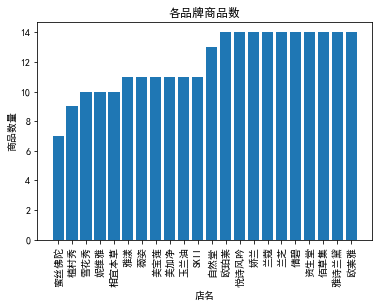

In [38]:
shop_count_s = data.groupby(by='店名')['sub_type'].nunique().sort_values()
plt.bar(shop_count_s.index,shop_count_s.values)
plt.xticks(rotation=90)
plt.title('各品牌商品数')
plt.ylabel('商品数量')
plt.xlabel('店名')

- 各店铺的销量

Text(0.5, 0, '店名')

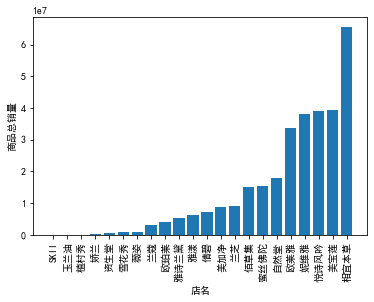

In [39]:
shop_product_s = data.groupby(by='店名')['sale_count'].sum().sort_values()
plt.bar(shop_product_s.index,shop_product_s.values)
plt.xticks(rotation=90)
plt.ylabel('商品总销量')
plt.xlabel('店名')

- 各店铺总销售额

Text(0.5, 0, '店名')

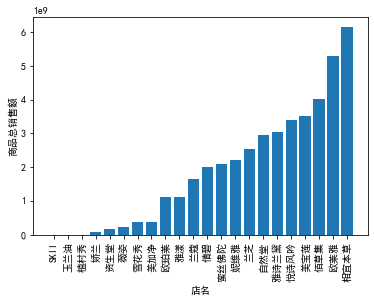

In [40]:
shop_amount_s = data.groupby(by='店名')['销售额'].sum().sort_values()
plt.bar(shop_amount_s.index,shop_amount_s.values)
plt.xticks(rotation=90)
plt.ylabel('商品总销售额')
plt.xlabel('店名')

- 各店铺的平均每单单价

Text(0, 0.5, '售出商品的平均单价')

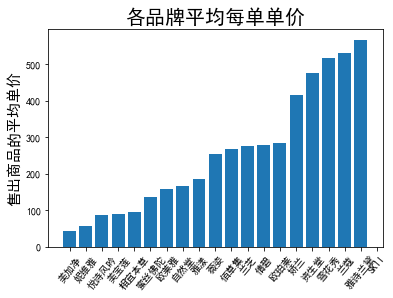

In [41]:
avg_price=(data.groupby('店名')['销售额'].sum()/data.groupby('店名').sale_count.sum()).sort_values()
plt.bar(avg_price.index,avg_price.values)
plt.xticks(rotation=50)
plt.title('各品牌平均每单单价', fontsize = 20)
plt.ylabel('售出商品的平均单价' , fontsize = 15)

- 观察结果
    - SKII,玉兰油，植村秀商品数量大概都在10-15的范围，而销量为0。
    - 相宜本草商品数量也只属于中游，但其销量销售额均排在第一位，由于其销量是第二名的大约两倍，而销售额远不到两倍，所以销售额/销量，也就是每一单的均价也是一个值得研究的新指标。
    

- 通过加入平均每单单价之后，观察销售额较高的几个品牌相宜本草，欧莱雅，佰草集，悦诗风吟，雅诗兰黛。其中相宜本草，悦诗风吟，欧莱雅都是平均单价200元以下的，佰草集为200-300元区间，雅诗兰黛为大于500元区间。
    - 是否能够判断价格亲民的品牌的销售额会相对来说更高？下面根据这里的数据先把平均单价分为几个区间，其中0-100元记为A类，100-200元记为B类，200-300元记为C类，300元及以上记为D类。

In [42]:
#四类ABCD分别代表0-100,100-200,200-300,300以上平均单价区间的各品牌
A=avg_price[(avg_price <= 100) & (avg_price > 0) ].index
B=avg_price[(avg_price <= 200) & (avg_price > 100) ].index
C=avg_price[(avg_price <= 300) & (avg_price > 200) ].index
D=avg_price[avg_price > 300 ].index

In [44]:
#每家店铺的总销售额
sum_sale=data.groupby('店名')['销售额'].sum()

In [45]:
#各类、各品牌的销售额占比
sum_sale_byprice=sum_sale[A].sort_values().append(sum_sale[B].sort_values()).append(sum_sale[C].sort_values()).append(sum_sale[D].sort_values())
sum_sale_byprice

店名
美加净     3.851918e+08
妮维雅     2.200168e+09
悦诗风吟    3.386962e+09
美宝莲     3.531516e+09
相宜本草    6.145791e+09
雅漾      1.120840e+09
蜜丝佛陀    2.082466e+09
自然堂     2.941153e+09
欧莱雅     5.312479e+09
薇姿      2.227425e+08
欧珀莱     1.119465e+09
倩碧      1.999199e+09
兰芝      2.525666e+09
佰草集     4.018679e+09
娇兰      7.560180e+07
资生堂     1.667226e+08
雪花秀     3.629061e+08
兰蔻      1.647341e+09
雅诗兰黛    3.040252e+09
Name: 销售额, dtype: float64

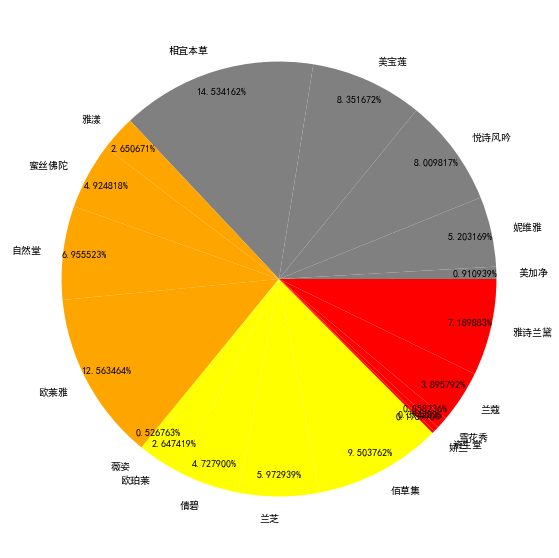

In [46]:
plt.figure(figsize=(20,10))
a = plt.pie(x=sum_sale_byprice,labels =sum_sale_byprice.index ,colors = ['grey']*len(A)+['orange']*len(B)+['yellow']*len(C)+['red']*len(D),autopct='%0f%%',pctdistance=0.9)


Text(0, 0.5, '平均销售额')

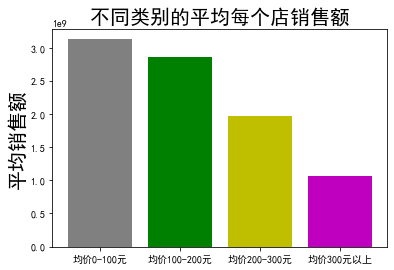

In [47]:
#各类的平均每个店销售额
plt.bar('均价0-100元',np.mean(sum_sale[A]),color = 'grey')
plt.bar('均价100-200元',np.mean(sum_sale[B]),color = 'g')
plt.bar('均价200-300元',np.mean(sum_sale[C]),color = 'y')
plt.bar('均价300元以上',np.mean(sum_sale[D]),color = 'm')
plt.title('不同类别的平均每个店销售额',fontsize = 20)
plt.ylabel('平均销售额',fontsize = 20)

- 结论
    - 观察饼图，不难发现A类平均单价的品牌所占的销售额比例最高，D类最少，并且D类中的一半以上收入都来自于雅诗兰黛品牌，而最受欢迎的相宜本草由于其价格便宜，销售额也最高。综合分析来说，在价格方面，价格越高的一般来说销量就会越低，反之亦有所相似之处。销量前四的品牌都属于A类，而属于D类的五个品牌销量都在最后七名之中。但收益来说也有很大的区别。从每个类中每个店的平均销售额也能看出，定价越低则平均销售额越高。

    - 比如A类中的美加净，销售额很低，观察分析其是平均单价最低的品牌，而且销量也并不算高，所以可以考虑几点：1.商品质量问题，虽然便宜但是是否产品质量过低降低了用户使用体验？2.知名度问题，是否需要提高知名度获取更多点击率以提高销量？3.定价问题，在质量过关的前提下，是否因为定价过低而降低了收益？能否在不大幅影响销量的情况下涨价？

    - 事实上，D类中，也就是高端商品中，雅诗兰黛占据了主要份额，一方面可能由于品牌效应，就个人主观的分析，雅诗兰黛为人熟知，在推广营销方面做的很好，所以销量尚可。另一方面，可能雅诗兰黛虽然相对价格较高，但是给使用者带来的使用体验非常好，所以很多消费者宁愿多花钱也要选择雅诗兰黛。这也可能是雅诗兰黛平均单价最高，然而销量却在D类中也最高的原因。

#### 接下来分析各个类别的销售情况
- 查看各大类和小类商品的销售额和销量之间的关系

<AxesSubplot:title={'center':'各小类销售额占比'}, ylabel='销售额'>

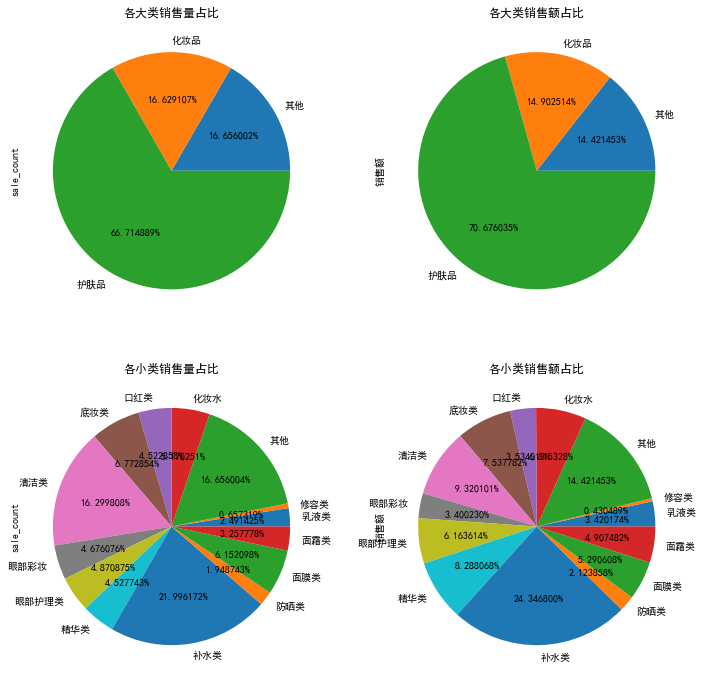

In [48]:
#大类销售量、销售额的占比
plt.figure(figsize = (12,12))
#销售量
plt.subplot(2,2,1)
data.groupby('main_type').sale_count.sum().plot.pie(autopct = '%3f%%',title = '各大类销售量占比')
#销售额
plt.subplot(2,2,2)
data.groupby('main_type')['销售额'].sum().plot.pie(autopct = '%0f%%',title = '各大类销售额占比')


#小类销售量、销售额的占比
plt.subplot(2,2,3)
data.groupby('sub_type').sale_count.sum().plot.pie(autopct = '%0f%%',title = '各小类销售量占比')

plt.subplot(2,2,4)
data.groupby('sub_type')['销售额'].sum().plot.pie(autopct = '%0f%%',title = '各小类销售额占比')

# plt.tight_layout()

- 结论：
    - 通过观察比较各个类销售量与销售额占比的关系，基本可以判断他们是正相关的。这也是符合常识的。
    - 在大类中，护肤品的销量远胜化妆品以及其他商品。而在小类之中，清洁类的护肤品销量最高，其次是补水类的护肤品。

#### 关于性别
- 接下来考虑性别因素，了解各类产品在男性消费者中的销量占比

In [67]:
data.head(1)

,update_time,id,title,price,sale_count,comment_count,店名,subtitle,sub_type,main_type,是否男士专用,销售额
0,2016/11/14,A18164178225,CHANDO/自然堂 雪域精粹纯粹滋润霜50g 补水保湿 滋润水润面霜,139.0,26719.0,2704.0,自然堂,"[CHANDO, /, 自然, 堂, , 雪域, 精粹, 纯粹, 滋润霜, 50g, ,...",面霜类,护肤品,否,3713941.0


- 男士专用中各子类销量占比和非男士专用中各子类销量的占比

In [50]:
isMan = data.loc[data['是否男士专用'] == '是']
notMan = data.loc[data['是否男士专用'] == '否']

In [51]:
isMan_s_count = isMan.groupby(by='sub_type')['sale_count'].sum()
notMan_s_count = notMan.groupby(by='sub_type')['sale_count'].sum()

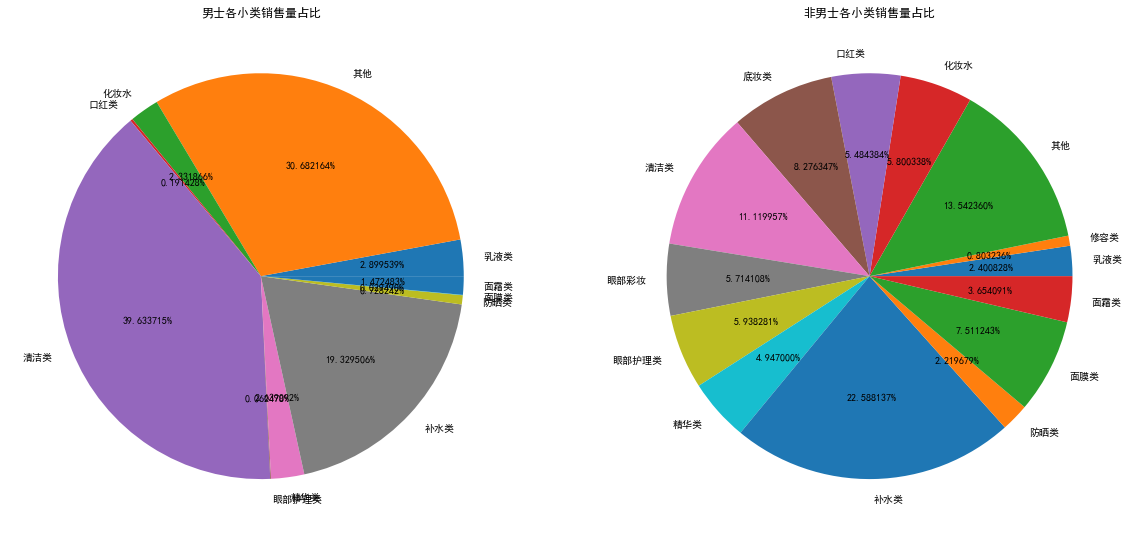

In [52]:
plt.figure(figsize=(20,20))
ax1 = plt.subplot(1,2,1)
plt.title('男士各小类销售量占比')
a1 = ax1.pie(isMan_s_count.values,labels=isMan_s_count.index,autopct = '%0f%%')
ax2 = plt.subplot(1,2,2)
plt.title('非男士各小类销售量占比')
a2 = ax2.pie(notMan_s_count.values,labels=notMan_s_count.index,autopct = '%0f%%')

- 男士和非男士专用销售量占总销售量和男士和非男士专用销售额占总销售额

In [53]:
man_count = data.groupby(by='是否男士专用')['sale_count'].sum()
man_amount = data.groupby(by='是否男士专用')['销售额'].sum()

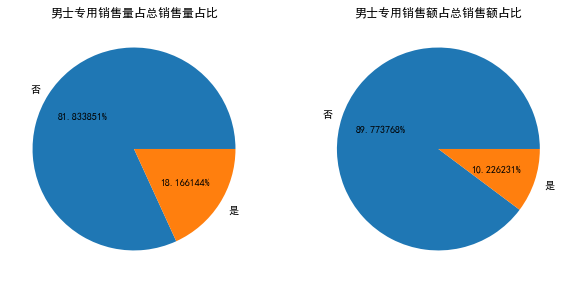

In [54]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
plt.title('男士专用销售量占总销售量占比')
a1 = ax1.pie(man_count.values,labels=man_count.index,autopct = '%0f%%')
ax2 = plt.subplot(1,2,2)
plt.title('男士专用销售额占总销售额占比')
a2 = ax2.pie(man_amount.values,labels=man_amount.index,autopct = '%0f%%')

- 结论：
    - 男士的销量基本来自于清洁类，其次是补水类。而这两类正是总销量中占比最高的两类。
    - 非男士专用中，补水类成为了销量最高的类别，清洁类降到了第3位。
    - 男士专用的销量以及销售额占比都比较低。

### 最后重点总结
- 价格便宜是消费者考虑的最多的一个点。销量最高的相宜本草的均价就很低，同时它的销售额也是最高额的。而均价较高的类中，只有雅诗兰黛的销售额相对客观。对于一些中高端商品，可以考虑适当降价来吸引更多消费者。而一些低端商品可以考虑多推广来提高知名度获取销量。
- 所有大类中，护肤品类的销量最高，其次是化妆品类。所有小类中，清洁类、补水类分别是销量的前二名。
- 男士专用的商品中，护肤品销量最高，而化妆品类中主要是唇膏。并且妮维雅占据了男士专用的大部分市场。